# HYPOTHESIS TESTING

## Table of Contents

1. [Introduction to Hypothesis Testing](#section1)<br>
      1.1 [A/B Testing](#section101)<br/>
2. [Problem Statement](#section2)<br/>
      2.1 [Hypothesis Statements](#section201)<br/>
3. [Implementation](#section3)    
4. [Conclusion](#section4)<br/>  

<a id=section1></a> 
## 1.Introduction

Data Science is a rapidly developing field where people are coming from different industries with backgrounds in Computer Science, Physics, Statistics, and Biology. So depending on a background, people can be less familiar with statistical tools. Working with data can be very dangerous because you may end up with wrong findings and make the wrong decision. So it’s always a good idea to check your results for **statistical** significance (**Hypothesis** Testing).


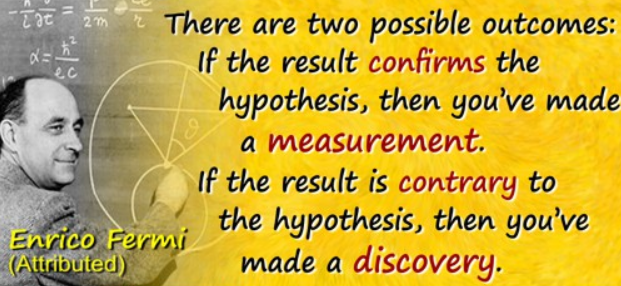

                                                                                                                              
                                                                                                                                                                                                                                                                                                                         
                                                                                                                        


### Defining Hypothesis

**Hypotheis is a statement to be tested and It is all  about the nature of thought and belief with propositional content and making Statements on basis of that**. 

Intiallialy following assumptions are made:  

- **Null Hypothesis** (H0, read "H zero"): states that all things remain equal. No phenomena is observed or there is not relationship between what you are comparing

- **Alternative Hypothesis** (H1, read “H one”): states the opposite of the Null Hypothesis. That there was some change, or observed relationship between what you are comparing


<a id=section101></a> 
## 1.1 A/B Testing

**A/B testing**  is a case of hypothesis testing (also known as split testing or bucket testing) is a method of comparing two versions of a webpage or app against each other to determine which one performs better.


<img src="https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/abtesting-672-1.gif"/>


<a id=section2></a> 
## 2.Problem Statement

A Yuva limited Company (fictional),wants to test whether their among two website designs **(old & new)**,which one is more liked by users?.

- We will be working to understand the results of an A/B test( on **landing** page) through run by an company website through hypothesis testing. This involves comparing new & old versions of a landing page, known as variation A and B, to see which performs better.
- The  objective  is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

- So lets understand the result of **A/B test** ,through  a statistical analysis (**hypothesis testing**) to choose better design. 

<a id=section201></a> 
### 2.1 Hypothesis Statements

These questions are the difficult parts associated with A/B tests in general.

1. For now, we need to make the decision just based on all the data provided. If we want to assume that the old page is better unless the new page proves to be definitely better at a **Type I** error rate of **5%**, what should your null and alternative hypotheses be? we can state your hypothesis in terms of words or in terms of $p_{old}$ and $p_{new}$, which are the **converted** rates for the **old** and **new** pages.

$$ H_0: p_{new} \leq p_{old}$$ 

$$ H_1: p_{new} \gt p_{old}$$
  


<a id=section3></a> 
## 3. Implemenation

  **Importing Required Packages**

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from scipy import stats
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

**Read in the dataset and take a look at the top few rows here:**

In [34]:
total_users = pd.read_csv('F:\\ML & Data Visualization\\Hypotheis\\AB_test.csv')

**The number of unique users in the dataset**

In [35]:
total_users['user_id'].nunique()

290584

**The proportion of users converted**

In [36]:
total_users['converted'].sum()/float(total_users.shape[0])

0.11965919355605512

**The number of times the new_page and treatment don't line up**

In [5]:
total_users.query("group == 'treatment' and landing_page == 'old_page'").shape[0] + total_users.query("group == 'control' and landing_page == 'new_page'").shape[0]

3893

For the rows where treatment is not aligned with new_page or control is not aligned with old_page, we cannot be sure if this row truly received the new or old page. 

**Do any of the rows have missing values?**

In [6]:
pd.isnull(total_users).any(axis = 1).sum()

0

In [7]:
treatment_x = total_users.query("group == 'treatment' and landing_page == 'new_page'")
control_y = total_users.query("group == 'control' and landing_page == 'old_page'")
users = treatment_x.append(control_y,ignore_index = True)#create new data frame total users

In [8]:
 ##Double Check all of the correct rows were removed - this should be 0
users[((users['group'] == 'treatment') == (users['landing_page'] == 'new_page')) == False].shape[0]

0

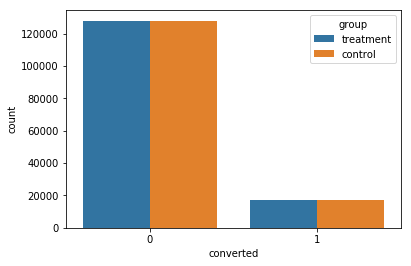

In [9]:
sns.countplot('converted',data=users,hue="group")

**How many unique user_ids in new page  landing page?**



In [10]:
unique_users=users['user_id'].nunique()   
unique_users

290584

**Check for duplicate user ID in among new users & specify its row information?**

In [11]:
users.loc[users['user_id'].duplicated(),:]['user_id']

1404    773192
Name: user_id, dtype: int64

In [12]:
users.loc[users['user_id'].duplicated(),:]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**Remove one of the rows with a duplicate user_id**

In [13]:
users.drop_duplicates(subset =['user_id'] , inplace = True)


### Probability

In [14]:
pd.crosstab(users.group,users.converted)

converted,0,1
group,,
control,127785,17489
treatment,128046,17264


**What is the probability of an individual converting regardless of the page they receive?**


In [15]:
users_conv = users.query(" converted == 1 ")
p_conv = users_conv.shape[0]/float(users.shape[0])
p_conv # P(converted)

0.11959708724499628

**Given that an individual was in the treatment group, what is the probability they converted?**

In [16]:
user_treatment = users.query(" group == 'treatment' ")
probability_conv_treatment = user_treatment['converted'].sum()/user_treatment.shape[0]
probability_conv_treatment # P(converted/treatment)

0.11880806551510564

**What is the probability that an individual received the new page?**

In [17]:

users.query(" landing_page == 'new_page' ").shape[0]/float(users.shape[0])

0.5000619442226688

**Given that an individual was in the control group, what is the probability they converted?**

In [18]:
user_control = users.query(" group == 'control' ")
probability_conv_control = user_control['converted'].sum()/user_treatment.shape[0]
probability_conv_control # P(converted/treatment)

0.12035647925125594

When we compare the conversion rate of new page with the conversion rate of old page, we see that the conversion rate falls down from **0.1196** to **0.1188**.

**Insights**

- The probability of an individual converting regardless of the page they receive is **11.96%**. 
- Given that an individual was in the control group, the probability they converted is **12.04%** 
- Given that an individual was in the treatment group, the probability they converted is **11.88%**. 

The probablity users converted in both control and treatment group are pretty similar to each other and probability of an individual converting regardless of the page they receive

**Now  we are looking at a null where there is no difference in conversion based on the page, which means the conversions for each page are the same**

**a.What is the convert rate for $p_{new}$ (New Page) under the null?**

In [19]:
# Compute converted success rate, which equals to the converted success rate regardless of page
p_new = round(float(users.query('converted == 1')['user_id'].nunique())/float(users['user_id'].nunique()),4)

p_new

0.1196


**b.What is the convert rate for $p_{old}$(Old Page) under the null?**

In [20]:
p_old = users['converted'].mean()
p_old

0.11959708724499628

**c.What is $n_{new}$(Unique users in new page)?**

In [21]:
n_new = users.query("group == 'treatment' ").shape[0]
n_new

145310

**d.What is $n_{old}$(Unique users in old page)?**

In [22]:
n_old = users.query("group == 'control' ").shape[0]
n_old

145274

**e.Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null. Store these $n_{new}$ 1's and 0's in new_page_converted**



In [23]:
new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

**f.Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null. Store these $n_{old}$ 1's and 0's in old_page_converted**

In [24]:
old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
old_page_converted

array([1, 1, 1, ..., 1, 0, 1])

**g.Find $p_{new}$ - $p_{old}$ for your simulated values from above**

In [25]:
new_page_converted.mean()

0.8801596586607942

In [26]:
old_page_converted.mean()


0.8803846524498534

In [27]:
new_page_converted.mean() - old_page_converted.mean()

-0.00022499378905926903

<a id=section302></a> 
### Binomial Distribution

**h.Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts a. through  g.above. Store all 10,000 values in p_diffs.**


In [28]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(diff)

**Plot a histogram of the p_diffs. Does this plot look like what you expected? Use the matching problem in the classroom to assure  you fully understand what was computed here?**

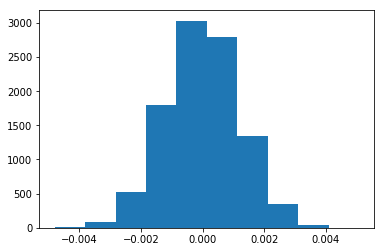

In [29]:

plt.hist(p_diffs);

**Let n_old and n_new refer the the number of rows associated with the old page and new pages, respectively**


In [30]:
n_conv_old = total_users.query("landing_page == 'old_page'")['converted'].sum()
n_conv_new = total_users.query("landing_page == 'new_page'")['converted'].sum()
n_old = total_users.query("landing_page == 'old_page'").shape[0]
n_new = total_users.query("landing_page == 'new_page'").shape[0]

<a id=section303></a>
### 3.3 Stats.proportions_ztest

In [31]:
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest([n_conv_old, n_conv_new], [n_old, n_new], alternative = 'larger')
z_score, p_value

(1.3683341399998907, 0.08560375454657104)

The p-value of **0.09** above shows that we fail to reject our null hyptothesis in favor of the alternative

<a id=section4></a> 
## 4.Conclusion : Final Inference

Earlier we chose our alternative hypothesis that the new page drives more conversion. <br>Then our evaluation of p-value suggested that we cannot reject the **null hypothesis**.

We then used built-in **z-test** to see the statistical significance. The **p-value** from z-test also suggested that there is not much evidence to reject the null.

**Inference** : We cannot reject null hypothesis

-------------------------------------------------------------------------------------------------------------------------------